In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 

In [2]:
#import data into notebook 
df1 = pd.read_csv('api_data_aadhar_biometric_0_500000.csv')
df2 = pd.read_csv('api_data_aadhar_biometric_500000_1000000.csv')
df3 = pd.read_csv('api_data_aadhar_biometric_1000000_1500000.csv')
df4 = pd.read_csv('api_data_aadhar_biometric_1500000_1861108.csv')

In [3]:
# concat the data 
biometric_data = pd.concat([df1, df2, df3, df4],axis = 0)

In [4]:
# rows , columns 
biometric_data.shape

(1861108, 6)

In [5]:
biometric_data.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [6]:
biometric_data.isnull().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

In [7]:
biometric_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1861108 entries, 0 to 361107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 99.4+ MB


In [8]:
biometric_data[biometric_data['district'].str.isnumeric()]

,date,state,district,pincode,bio_age_5_17,bio_age_17_


# data cleaning

In [9]:
biometric_data.duplicated().sum()

94896

In [10]:
biometric_data.shape

(1861108, 6)

In [11]:
1861108-94896

1766212

In [12]:
biometric_data[biometric_data.duplicated()]

,date,state,district,pincode,bio_age_5_17,bio_age_17_
110000,01-09-2025,Chhattisgarh,Kondagaon,494229,0,1
110001,01-09-2025,Chhattisgarh,Kondagaon,494230,1,0
110002,01-09-2025,Chhattisgarh,Korba,495119,5,35
110003,01-09-2025,Chhattisgarh,Korba,495446,0,16
110004,01-09-2025,Chhattisgarh,Korba,495674,10,34
...,...,...,...,...,...,...
360707,29-12-2025,Andhra Pradesh,Prakasam,523327,3,7
360708,29-12-2025,Andhra Pradesh,Prakasam,523368,2,3
360709,29-12-2025,Andhra Pradesh,Prakasam,523370,1,1
360710,29-12-2025,Andhra Pradesh,Prakasam,523371,2,1


In [13]:
biometric_data = biometric_data.drop_duplicates()

In [14]:
a = biometric_data.duplicated().any()
print(a)

False


In [15]:
biometric_data.shape

(1766212, 6)

In [16]:
# drop irrelevant columns
biometric_data.drop(columns = ['district', 'pincode'], inplace = True)

In [17]:
biometric_data.rename(columns ={ 'bio_age_5_17':'minor', 'bio_age_17_':'adult'}, inplace = True)

In [18]:
biometric_data.shape

(1766212, 4)

In [19]:
biometric_data.head(2)

,date,state,minor,adult
0,01-03-2025,Haryana,280,577
1,01-03-2025,Bihar,144,369


In [20]:
# states data
biometric_data['state'].nunique()

57

In [21]:
biometric_data[biometric_data['state'].str.isnumeric() ]

,date,state,minor,adult


In [22]:
biometric_data['state'].unique()

array(['Haryana', 'Bihar', 'Jammu and Kashmir', 'Tamil Nadu',
       'Maharashtra', 'Gujarat', 'Odisha', 'West Bengal', 'Kerala',
       'Rajasthan', 'Punjab', 'Himachal Pradesh', 'Uttar Pradesh',
       'Assam', 'Uttarakhand', 'Madhya Pradesh', 'Karnataka',
       'Andhra Pradesh', 'Telangana', 'Goa', 'Nagaland', 'Jharkhand',
       'Delhi', 'Chhattisgarh', 'Meghalaya', 'Chandigarh', 'Orissa',
       'Puducherry', 'Pondicherry', 'Manipur', 'Sikkim', 'Tripura',
       'Mizoram', 'Arunachal Pradesh', 'Ladakh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu',
       'Andaman and Nicobar Islands', 'Andaman & Nicobar Islands',
       'Dadra and Nagar Haveli', 'Lakshadweep', 'Daman & Diu',
       'Dadra & Nagar Haveli', 'Jammu & Kashmir', 'WESTBENGAL',
       'andhra pradesh', 'Westbengal', 'West  Bengal', 'WEST BENGAL',
       'West Bangal', 'ODISHA', 'odisha', 'West bengal', 'west Bengal',
       'Uttaranchal', 'Chhatisgarh', 'Tamilnadu'], dtype=object)

In [23]:
biometric_data['state'] = biometric_data['state'].str.replace('&' , 'and') # replace & with and 

In [24]:
biometric_data.state.nunique()

53

In [25]:
biometric_data['state'] = biometric_data['state'].str.title() # convert text -> title case 

In [26]:
biometric_data.state.nunique()

46

In [27]:
biometric_data['state'] = biometric_data['state'].str.replace(r'\s+', ' ', regex=True)

In [28]:
biometric_data.state.nunique()

45

In [29]:
# create dictinory 
state_dict = {
    # Andaman
    'Andaman And Nicobar Islands': 'Andaman and Nicobar Islands',

    # Dadra & Daman (merged UT)
    'Dadra And Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'The Dadra And Nagar Haveli And Daman And Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra And Nagar Haveli And Daman And Diu':'Dadra and Nagar Haveli and Daman and Diu',

    # Jammu & Kashmir
    'Jammu And Kashmir': 'Jammu and Kashmir',

    # Odisha
    'Odisha': 'Odisha',
    'Orissa': 'Odisha',

    # Puducherry
    'Pondicherry': 'Puducherry',

    # Andhra Pradesh
    'Andhra Pradesh': 'Andhra Pradesh',

    # West Bengal
    'West Bengal': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West Bengal': 'West Bengal', 

    # Tamil Nadu
    'Tamilnadu': 'Tamil Nadu',
    
    #Chhattisgarh
    'Chhatisgarh' : 'Chhattisgarh',
    
    #Uttarakhand
    'Uttaranchal' : 'Uttarakhand'
}


In [30]:
biometric_data['state'] = biometric_data['state'].replace(state_dict)

In [31]:
biometric_data.state.nunique()

36

In [32]:
sorted(biometric_data['state'].unique())

['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

inconsistent data -> 57 states <br>
cleaned data -> 36 states

In [33]:
biometric_data.shape

(1766212, 4)

In [34]:
biometric_data.columns

Index(['date', 'state', 'minor', 'adult'], dtype='object')

# feature engineering

In [35]:
biometric_data['total'] = biometric_data['minor'] + biometric_data['adult']

In [36]:
biometric_data.head()

,date,state,minor,adult,total
0,01-03-2025,Haryana,280,577,857
1,01-03-2025,Bihar,144,369,513
2,01-03-2025,Jammu and Kashmir,643,1091,1734
3,01-03-2025,Bihar,256,980,1236
4,01-03-2025,Tamil Nadu,271,815,1086


In [37]:
biometric_data.tail()

,date,state,minor,adult,total
361103,29-12-2025,West Bengal,4,9,13
361104,29-12-2025,West Bengal,0,1,1
361105,29-12-2025,West Bengal,0,3,3
361106,29-12-2025,West Bengal,2,0,2
361107,29-12-2025,West Bengal,0,1,1


# Aggregate data by states + data standardization

In [38]:
biometric_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1766212 entries, 0 to 361107
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   date    object
 1   state   object
 2   minor   int64 
 3   adult   int64 
 4   total   int64 
dtypes: int64(3), object(2)
memory usage: 80.9+ MB


In [39]:
# 1. group data using states 
# 2. convert numbers -> ratios 

In [40]:
biometric_data.head(1)

,date,state,minor,adult,total
0,01-03-2025,Haryana,280,577,857


In [41]:
biometric_data.to_csv('cleaned_biometric_data.csv', index = False)

In [42]:
biometric_state_data = biometric_data.groupby('state')[['minor', 'adult', 'total']].sum()
biometric_state_data.shape

(36, 3)

In [43]:
biometric_state_data.head()

,minor,adult,total
state,,,
Andaman and Nicobar Islands,11354,8640,19994
Andhra Pradesh,2181567,1429209,3610776
Arunachal Pradesh,41143,28916,70059
Assam,574106,371044,945150
Bihar,2160544,2618424,4778968


In [44]:
# state with max no. of biometric updates 
print(biometric_state_data['total'].nlargest(1))

print()

# state with minimum no. of biometric updates
print(biometric_state_data['total'].nsmallest(1))

state
Uttar Pradesh    9367083
Name: total, dtype: int64

state
Lakshadweep    4745
Name: total, dtype: int64


In [45]:
# state with max no. of biometric updates in minors 
print(biometric_state_data['minor'].nlargest(1))

print()

# state with max no. of biometric updates in  adults 
print(biometric_state_data['adult'].nlargest(1))

state
Uttar Pradesh    6076420
Name: minor, dtype: int64

state
Maharashtra    5583627
Name: adult, dtype: int64


In [46]:
# state with minimum no. of biometric updates in minors
print(biometric_state_data['minor'].nsmallest(1))

print()

# state with minimum no. of biometric updates in adults
print(biometric_state_data['adult'].nsmallest(1))

state
Lakshadweep    2195
Name: minor, dtype: int64

state
Lakshadweep    2550
Name: adult, dtype: int64


In [47]:
biometric_state_data[biometric_state_data['minor'] ==0]

,minor,adult,total
state,,,


In [48]:
biometric_state_data[biometric_state_data['adult'] ==0]

,minor,adult,total
state,,,


In [49]:
biometric_state_data[biometric_state_data['total'] ==0]

,minor,adult,total
state,,,


In [50]:
# total biometric updates in minor 
minor_bio = biometric_state_data['minor'].sum()
minor_bio

33456647

In [51]:
# total biometric updates in adults
adult_bio  = biometric_state_data['adult'].sum()
adult_bio

34804412

In [52]:
# total biometric updates 
total_bio = biometric_state_data['total'].sum()
total_bio

68261059

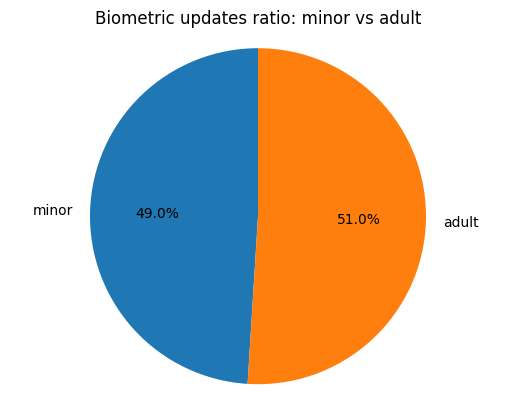

In [56]:
# calculate each category participation in total biometric update
bio_updates = [33456647,34804412]
label = ['minor', 'adult']
plt.pie(bio_updates, labels=label,  autopct='%1.1f%%', startangle=90)
plt.title('Biometric updates ratio: minor vs adult')
plt.axis('equal')
plt.show()

In [57]:
# convert numebrs to ratio 
biometric_state_data['minor_ratio'] = round((biometric_state_data['minor']/biometric_state_data['total'])*100,1)
biometric_state_data['adult_ratio'] = round((biometric_state_data['adult']/biometric_state_data['total'])*100,1)
biometric_state_data.head()

,minor,adult,total,minor_ratio,adult_ratio
state,,,,,
Andaman and Nicobar Islands,11354,8640,19994,56.8,43.2
Andhra Pradesh,2181567,1429209,3610776,60.4,39.6
Arunachal Pradesh,41143,28916,70059,58.7,41.3
Assam,574106,371044,945150,60.7,39.3
Bihar,2160544,2618424,4778968,45.2,54.8


In [58]:
biometric_state_data.to_csv('biometric_ratio.csv', index = False)

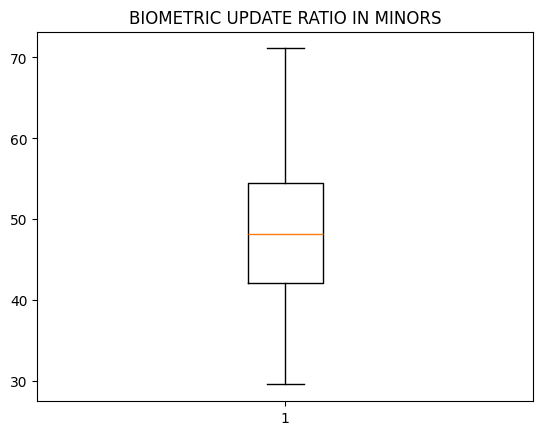

In [59]:
# box plot to find outliers 
plt.boxplot(biometric_state_data['minor_ratio'])
plt.title('BIOMETRIC UPDATE RATIO IN MINORS')
plt.show()

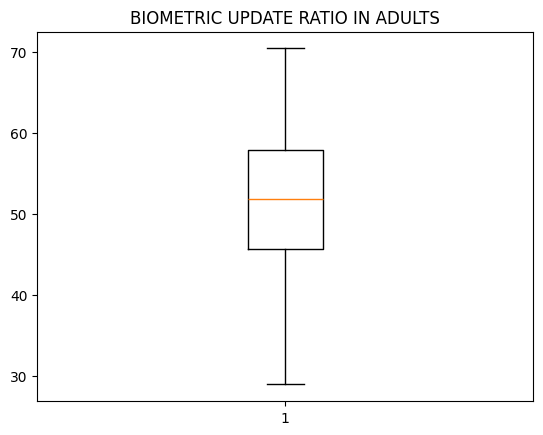

In [60]:
plt.boxplot(biometric_state_data['adult_ratio'])
plt.title('BIOMETRIC UPDATE RATIO IN ADULTS')
plt.show()

Biometric update behavior is structurally similar across states, even if volumes differ.

In [61]:
biometric_state_data.loc['Meghalaya']

minor          35911.0
adult          50663.0
total          86574.0
minor_ratio       41.5
adult_ratio       58.5
Name: Meghalaya, dtype: float64

In [62]:
national_avg  = round(biometric_state_data[['minor','adult', 'total','minor_ratio', 'adult_ratio']].mean(), 1)

In [63]:
biometric_state_data.loc['national_avg'] = national_avg

In [64]:
biometric_state_data.tail()

,minor,adult,total,minor_ratio,adult_ratio
state,,,,,
Tripura,144132.0,141192.0,285324.0,50.5,49.5
Uttar Pradesh,6076420.0,3290663.0,9367083.0,64.9,35.1
Uttarakhand,408293.0,332503.0,740796.0,55.1,44.9
West Bengal,1023454.0,1458738.0,2482192.0,41.2,58.8
national_avg,929351.3,966789.2,1896140.5,49.1,50.9


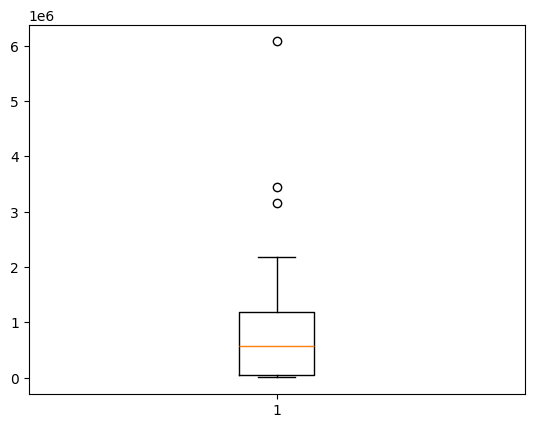

In [65]:
# box plot to find outliers 
plt.boxplot(biometric_state_data['minor'])
plt.show()

In [66]:
# states with ax population have max updates 
biometric_state_data[biometric_state_data['minor'] > 3*1e6]

,minor,adult,total,minor_ratio,adult_ratio
state,,,,,
Madhya Pradesh,3148670.0,2671066.0,5819736.0,54.1,45.9
Maharashtra,3437083.0,5583627.0,9020710.0,38.1,61.9
Uttar Pradesh,6076420.0,3290663.0,9367083.0,64.9,35.1


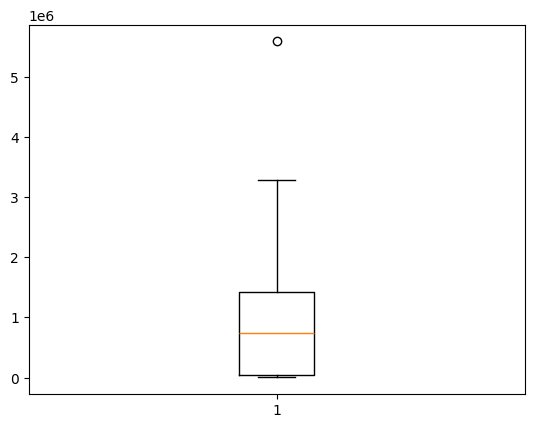

In [67]:
plt.boxplot(biometric_state_data['adult'])
plt.show()

In [68]:
biometric_state_data[biometric_state_data['adult'] > 5*1e6]

,minor,adult,total,minor_ratio,adult_ratio
state,,,,,
Maharashtra,3437083.0,5583627.0,9020710.0,38.1,61.9


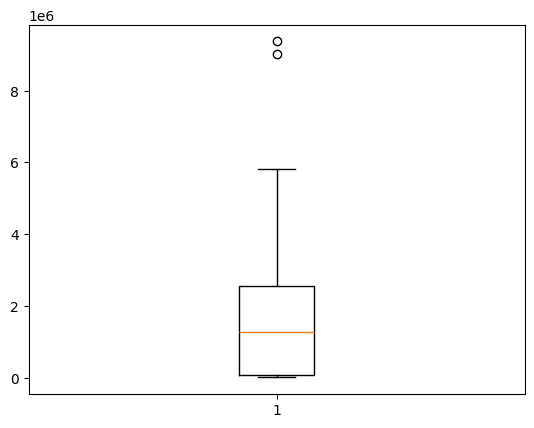

In [69]:
plt.boxplot(biometric_state_data['total'])
plt.show()

In [70]:
biometric_state_data[biometric_state_data['total'] > 0.8*1e7]

,minor,adult,total,minor_ratio,adult_ratio
state,,,,,
Maharashtra,3437083.0,5583627.0,9020710.0,38.1,61.9
Uttar Pradesh,6076420.0,3290663.0,9367083.0,64.9,35.1


While boxplots of absolute biometric update counts reveal several outlier states, these outliers largely correspond to high-population regions. When normalized using ratios, the outliers disappear, demonstrating that biometric update activity is proportionally consistent across states. This highlights the importance of ratio-based analysis for fair inter-state comparison.

Big states (UP, Maharashtra, Tamil Nadu, etc.) appear as outliers

Outliers here represent population size, not anomalies.

Mizoram and Chandigarh show a child-driven biometric update pattern, suggesting efficient tracking of age-based Aadhaar updates.

Adult biometric updates dominate in these states.

States such as Mizoram and Chandigarh exhibit a disproportionately high share of biometric updates among minors, indicating strong compliance with age-based Aadhaar update requirements. Conversely, Nagaland, Chhattisgarh, and Maharashtra show adult-dominated biometric update patterns, suggesting system maturity and increased need for data maintenance. High-population states like Uttar Pradesh and Maharashtra naturally record the highest absolute update volumes, emphasizing the importance of ratio-based analysis over raw counts.

In [73]:
print(f'state with maximum biometric update ratio in minors :{biometric_state_data['minor_ratio'].nlargest(1)} ')
print()
print(f'state with minimum biometric update ratio in adults :{biometric_state_data['adult_ratio'].nsmallest(1)} ')

state with maximum biometric update ratio in minors :state
Mizoram    71.1
Name: minor_ratio, dtype: float64 

state with minimum biometric update ratio in adults :state
Mizoram    28.9
Name: adult_ratio, dtype: float64 


In [75]:
print(f'state with maximum biometric update ratio in adults :{biometric_state_data['adult_ratio'].nlargest(1)} ')
print()
print(f'state with minimum biometric update ratio in minors :{biometric_state_data['minor_ratio'].nsmallest(1)} ')

state with maximum biometric update ratio in adults :state
Nagaland    70.4
Name: adult_ratio, dtype: float64 

state with minimum biometric update ratio in minors :state
Nagaland    29.6
Name: minor_ratio, dtype: float64 


In [76]:
outlier_state = biometric_state_data.loc[['Mizoram', 'Nagaland', 'national_avg']]
outlier_state

,minor,adult,total,minor_ratio,adult_ratio
state,,,,,
Mizoram,84746.0,34414.0,119160.0,71.1,28.9
Nagaland,32005.0,76266.0,108271.0,29.6,70.4
national_avg,929351.3,966789.2,1896140.5,49.1,50.9


In [77]:
outlier_state.drop(columns = ['minor', 'adult', 'total'], axis = 1, inplace = True)

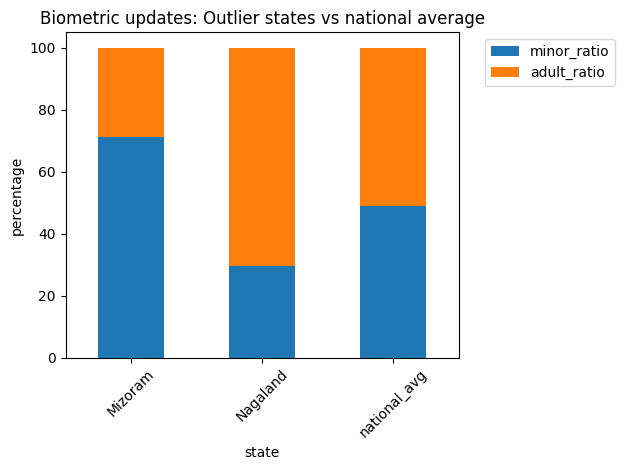

In [78]:
outlier_state.plot( kind = 'bar' , stacked = True , mark_right=True , ylabel = 'percentage')
plt.title('Biometric updates: Outlier states vs national average')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()